In [1]:
#part1: separación entre reciclable y orgánica
#https://www.kaggle.com/yannick09/waste-classification

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
import numpy as np

#carga de datos y prprocesamiento

Using TensorFlow backend.


In [2]:
#conexión a drive 

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
#/content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [7]:
!kaggle datasets download -d techsash/waste-classification-data

 96% 411M/427M [00:17<00:01, 15.6MB/s]
100% 427M/427M [00:17<00:00, 25.3MB/s]


In [ ]:
#!kaggle datasets download -d asdasdasasdas/garbage-classification

 82% 67.0M/82.0M [00:00<00:00, 67.1MB/s]
100% 82.0M/82.0M [00:00<00:00, 105MB/s] 


In [8]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zipn

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5515.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55

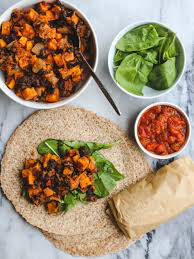

In [9]:
Image.open('DATASET/TEST/O/O_13191.jpg')

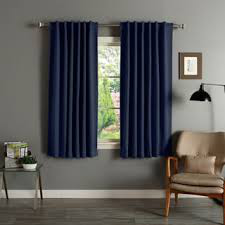

In [10]:
Image.open('DATASET/TEST/R/R_10045.jpg')

In [11]:
# preprocesamiento de imgs

datagen_tr = ImageDataGenerator( rescale = 1./255,validation_split=0.2)
datagen_ts = ImageDataGenerator( rescale = 1./255)

In [12]:
data_tr = datagen_tr.flow_from_directory('DATASET/TRAIN', target_size = (128, 128), batch_size = 32, class_mode = 'binary',subset='training')

data_val = datagen_tr.flow_from_directory('DATASET/TRAIN', target_size = (128, 128), batch_size = 32, class_mode = 'binary',subset='validation')

data_ts = datagen_ts.flow_from_directory('DATASET/TEST', target_size = (128, 128), batch_size = 32, shuffle=False, class_mode = "binary")

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [49]:
#modelo 1: sacado del desafío de keras
from tensorflow.keras import regularizers


model = Sequential()
model.add(Conv2D(35, (3, 3), input_shape = (128,128, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(35, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 30,  kernel_regularizer=regularizers.l2(0.01), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 126, 126, 35)      980       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 35)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 61, 61, 35)        11060     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 35)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 31500)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                945030    
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)               

In [50]:
#train 1

history = model.fit_generator(data_tr, steps_per_epoch = 562, verbose=True,epochs = 32, validation_data = data_val, validation_steps = 140)

Epoch 1/32
562/562 [==============================] - 28s 50ms/step - loss: 0.5339 - accuracy: 0.7973 - val_loss: 0.5422 - val_accuracy: 0.7685
Epoch 2/32
562/562 [==============================] - 28s 50ms/step - loss: 0.4805 - accuracy: 0.8183 - val_loss: 0.5403 - val_accuracy: 0.8138
Epoch 3/32
562/562 [==============================] - 29s 51ms/step - loss: 0.4745 - accuracy: 0.8266 - val_loss: 0.3822 - val_accuracy: 0.8056
Epoch 4/32
562/562 [==============================] - 28s 50ms/step - loss: 0.4671 - accuracy: 0.8324 - val_loss: 0.2994 - val_accuracy: 0.8127
Epoch 5/32
562/562 [==============================] - 27s 49ms/step - loss: 0.4561 - accuracy: 0.8350 - val_loss: 0.5087 - val_accuracy: 0.8078
Epoch 6/32
562/562 [==============================] - 27s 48ms/step - loss: 0.4551 - accuracy: 0.8380 - val_loss: 0.3446 - val_accuracy: 0.7984
Epoch 7/32
562/562 [==============================] - 27s 48ms/step - loss: 0.4516 - accuracy: 0.8431 - val_loss: 0.3988 - val_accuracy:

Text(0.5, 1.0, 'Accuracy Curves')

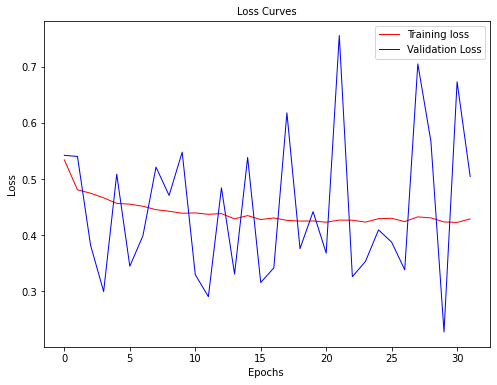

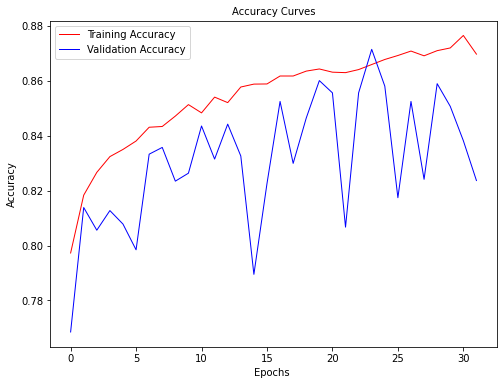

In [51]:
#Gráfico de loss del modelo 1 (comparación de conjunto de validación con el de entrenamiento)
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)


#Gráfico de accuracy del modelo 1 (comparación de conjunto de validación con el de entrenamiento)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=1.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Curves',fontsize=10)


Acc score:  0.868682849184242


Text(0.5, 15.0, 'Predicted label')

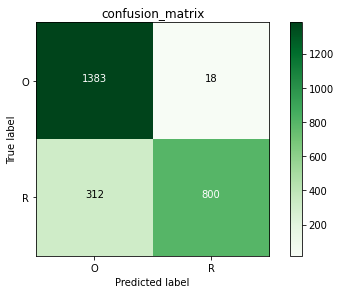

In [52]:
 from sklearn.metrics import accuracy_score
Y_pred = model.predict_generator(data_ts)
y_pred =np.around(Y_pred, decimals=0)

print("Acc score: ",accuracy_score(data_ts.classes,y_pred))


from sklearn.metrics import confusion_matrix
import itertools

confusion_mtx = confusion_matrix(data_ts.classes,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['O','R'])
plt.yticks(tick_marks, ['O','R'])
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [28]:
from keras.applications.inception_v3 import InceptionV3

In [29]:
base_model =InceptionV3(weights = 'imagenet', include_top = False)

87916544/87910968 [==============================] - 8s 0us/step


In [30]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(30, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

In [37]:
import tensorflow
print(tensorflow.keras.__version__)

2.3.0-tf


In [72]:
from keras.models import Model

model2 = Model(inputs=base_model.input, outputs=predictions)

In [73]:
for layer in base_model.layers:
    layer.trainable = False

In [74]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [75]:
history = model2.fit_generator(data_tr, steps_per_epoch = 560, verbose=True,epochs = 5, validation_data = data_val, validation_steps = 140)

Epoch 1/5
560/560 [==============================] - 37s 66ms/step - loss: 0.3108 - accuracy: 0.8653 - val_loss: 0.5522 - val_accuracy: 0.9071
Epoch 2/5
560/560 [==============================] - 33s 59ms/step - loss: 0.3177 - accuracy: 0.8622 - val_loss: 0.4716 - val_accuracy: 0.9062
Epoch 3/5
560/560 [==============================] - 33s 59ms/step - loss: 0.3026 - accuracy: 0.8706 - val_loss: 0.5284 - val_accuracy: 0.8911
Epoch 4/5
560/560 [==============================] - 33s 59ms/step - loss: 0.2970 - accuracy: 0.8720 - val_loss: 0.3367 - val_accuracy: 0.8576
Epoch 5/5
560/560 [==============================] - 33s 59ms/step - loss: 0.2961 - accuracy: 0.8755 - val_loss: 0.2951 - val_accuracy: 0.8750


In [76]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

In [77]:
from keras.optimizers import SGD
model2.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss ='binary_crossentropy', metrics = ['accuracy'])

In [78]:
history = model2.fit_generator(data_tr, steps_per_epoch = 560, verbose=True,epochs = 27, validation_data = data_val, validation_steps = 140)

Epoch 1/27
560/560 [==============================] - 37s 66ms/step - loss: 0.2431 - accuracy: 0.9031 - val_loss: 0.4469 - val_accuracy: 0.8790
Epoch 2/27
560/560 [==============================] - 33s 59ms/step - loss: 0.2787 - accuracy: 0.8796 - val_loss: 0.3224 - val_accuracy: 0.8808
Epoch 3/27
560/560 [==============================] - 33s 59ms/step - loss: 0.2760 - accuracy: 0.8820 - val_loss: 0.3052 - val_accuracy: 0.8817
Epoch 4/27
560/560 [==============================] - 33s 59ms/step - loss: 0.2794 - accuracy: 0.8798 - val_loss: 0.1719 - val_accuracy: 0.8786
Epoch 5/27
560/560 [==============================] - 33s 58ms/step - loss: 0.2795 - accuracy: 0.8825 - val_loss: 0.2242 - val_accuracy: 0.8797
Epoch 6/27
560/560 [==============================] - 33s 58ms/step - loss: 0.2776 - accuracy: 0.8823 - val_loss: 0.1989 - val_accuracy: 0.8810
Epoch 7/27
560/560 [==============================] - 33s 58ms/step - loss: 0.2765 - accuracy: 0.8793 - val_loss: 0.0884 - val_accuracy:

Text(0.5, 1.0, 'Accuracy Curves')

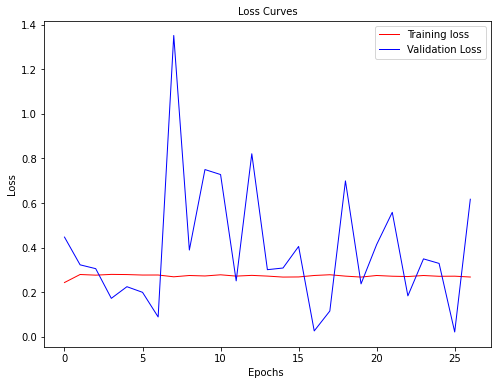

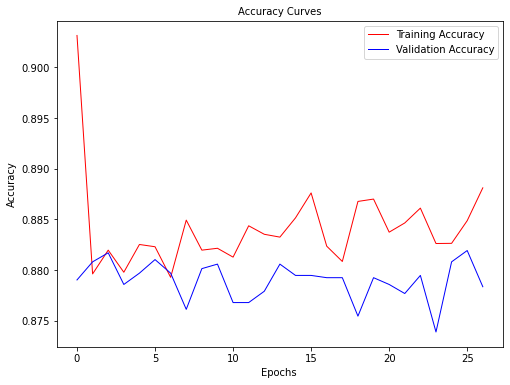

In [79]:
#Gráfico de loss del modelo 1 (comparación de conjunto de validación con el de entrenamiento)
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)


#Gráfico de accuracy del modelo 1 (comparación de conjunto de validación con el de entrenamiento)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=1.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Curves',fontsize=10)


Acc score:  0.8324711500198966


Text(0.5, 15.0, 'Predicted label')

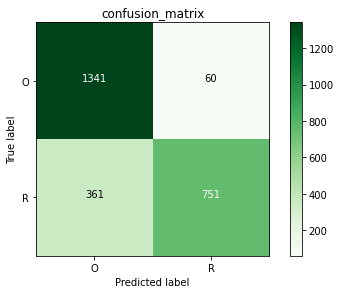

In [80]:
Y_pred = model2.predict_generator(data_ts)
y_pred =np.around(Y_pred, decimals=0)

print("Acc score: ",accuracy_score(data_ts.classes,y_pred))

confusion_mtx = confusion_matrix(data_ts.classes,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['O','R'])
plt.yticks(tick_marks, ['O','R'])
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [70]:
#guardar modelo de todas formas

model2.save("InceptionV3_2.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [71]:
model.save("From_scratchV1.h5")

In [67]:
from tensorflow.keras.models import load_model

model3= load_model('InceptionV3_1.h5')

Acc score:  0.8670911261440509


Text(0.5, 15.0, 'Predicted label')

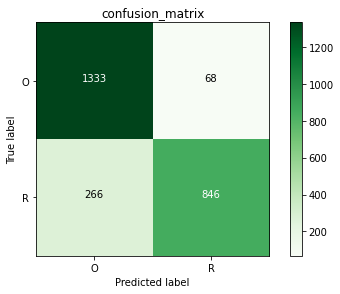

In [69]:
Y_pred = model3.predict(data_ts)
y_pred =np.around(Y_pred, decimals=0)

print("Acc score: ",accuracy_score(data_ts.classes,y_pred))

confusion_mtx = confusion_matrix(data_ts.classes,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['O','R'])
plt.yticks(tick_marks, ['O','R'])
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')